# Task A

In [69]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

In [70]:
#store labels in arrays
train_label_path = fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\label.csv"
test_label_path = fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\test\label.csv"

train_labels = pd.read_csv(train_label_path)
test_labels = pd.read_csv(test_label_path)


In [71]:
#store images in arrays
train_images = []
for i in range(3000):
    train_images.append(fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\image\IMAGE_{i:04}.jpg".format(i))

test_images = []
for i in range(3000):
    test_images.append(fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\image\IMAGE_{i:04}.jpg".format(i))
    

In [72]:
#Create a new column in the labels dataframe to indicate if there is a cancer

train_labels.loc[train_labels.label != "no_tumor", "cancer"] = 1
test_labels.loc[test_labels.label != "no_tumor", "cancer"] = 1

train_labels.loc[train_labels.label == "no_tumor", "cancer"] = 0
test_labels.loc[test_labels.label == "no_tumor", "cancer"] = 0

#train_labels.head(30)
#test_labels.head(30)

In [73]:
#create a list for labels and images from training set to be stored in
X = []
y = []

#this is the new test dataset provided
x_testdata = []
y_testdata = []

#iterate through the labels and images and store them in the lists
for i in range (3000):
    im = cv2.imread(train_images[i], cv2.IMREAD_GRAYSCALE)
    X.append(im)
    y.append(train_labels.loc[i, "cancer"])
    
for i in range (200):
    im_test = cv2.imread(test_images[i], cv2.IMREAD_GRAYSCALE)
    x_testdata.append(im_test)
    y_testdata.append(test_labels.loc[i, "cancer"])

In [74]:
#turn them into arrays
X = np.array(X)
y = np.array(y)
x_testdata = np.array(x_testdata)
y_testdata = np.array(y_testdata)

In [75]:
X.shape

(3000, 512, 512)

In [76]:
#transform image data from 3 dimensions to 2 dimensions so that the SVM can use it
X =  X.reshape(len(X), -1)
x_testdata = x_testdata.reshape(len(x_testdata), -1)

In [77]:
X.shape

(3000, 262144)

In [62]:
im = cv2.imread(train_images[0], cv2.IMREAD_GRAYSCALE)
im.shape

(512, 512)

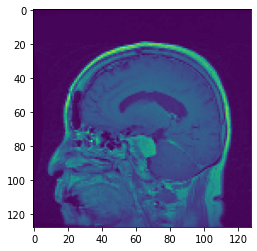

In [63]:
#Image.open(train_images[0])
imgplot = plt.imshow(im[::4,::4])

In [78]:
#split the given training dataset into test and train sets used to train the models
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20, shuffle = True)


In [79]:
x_train.shape
#y_train.shape

(2400, 262144)

# Dimensionality reduction - Principal Components Analysis

In [66]:
#pca = PCA(0.98)
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)
#x_testdata = pca.transform(x_testdata)

# SVM

In [67]:
# sklearn functions implementation

def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel='poly')

    classifier.fit(training_images, training_labels)

    pred = classifier.predict(test_images)

    print(pred)

    print("Accuracy:", accuracy_score(test_labels, pred))

pred=img_SVM(x_train, y_train, x_test, y_test)
    

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.

# K-NN

In [18]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred = neigh.predict(X_test)
    return Y_pred

y_pred=KNNClassifier(x_train, y_train, x_test,4)

score=metrics.accuracy_score(y_test,y_pred)
print(score)


0.935


In [26]:
score_list=[]

#chose the range of number of neighbours that the code will test to determine which is best
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_testdata)
    score_list.append(metrics.accuracy_score(y_testdata,pred_i))
            

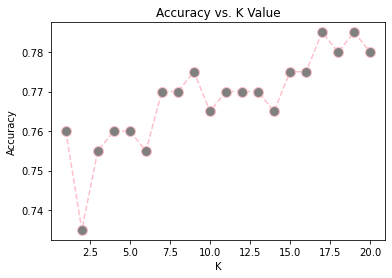

In [27]:
plt.plot(range(1,21),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Random Forest

In [32]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(x_train,y_train)

# prediction on test set
y_pred=clf.predict(x_test)

print(f'Test feature {x_test[0]}\n True class {y_test[0]}\n predict class {y_pred[0]}')

Test feature [0 0 0 ... 1 1 0]
 True class 1.0
 predict class 1.0


In [81]:
y_pred=clf.predict(x_testdata)

In [82]:
print("Random Forest test Accuracy:", accuracy_score(y_testdata, y_pred))

Random Forest test Accuracy: 0.755


In [97]:
def visualise_tree(tree_to_print):
    plt.figure()
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
    tree.plot_tree(tree_to_print,
               filled = True,
              rounded=True);
    plt.show()

<Figure size 432x288 with 0 Axes>

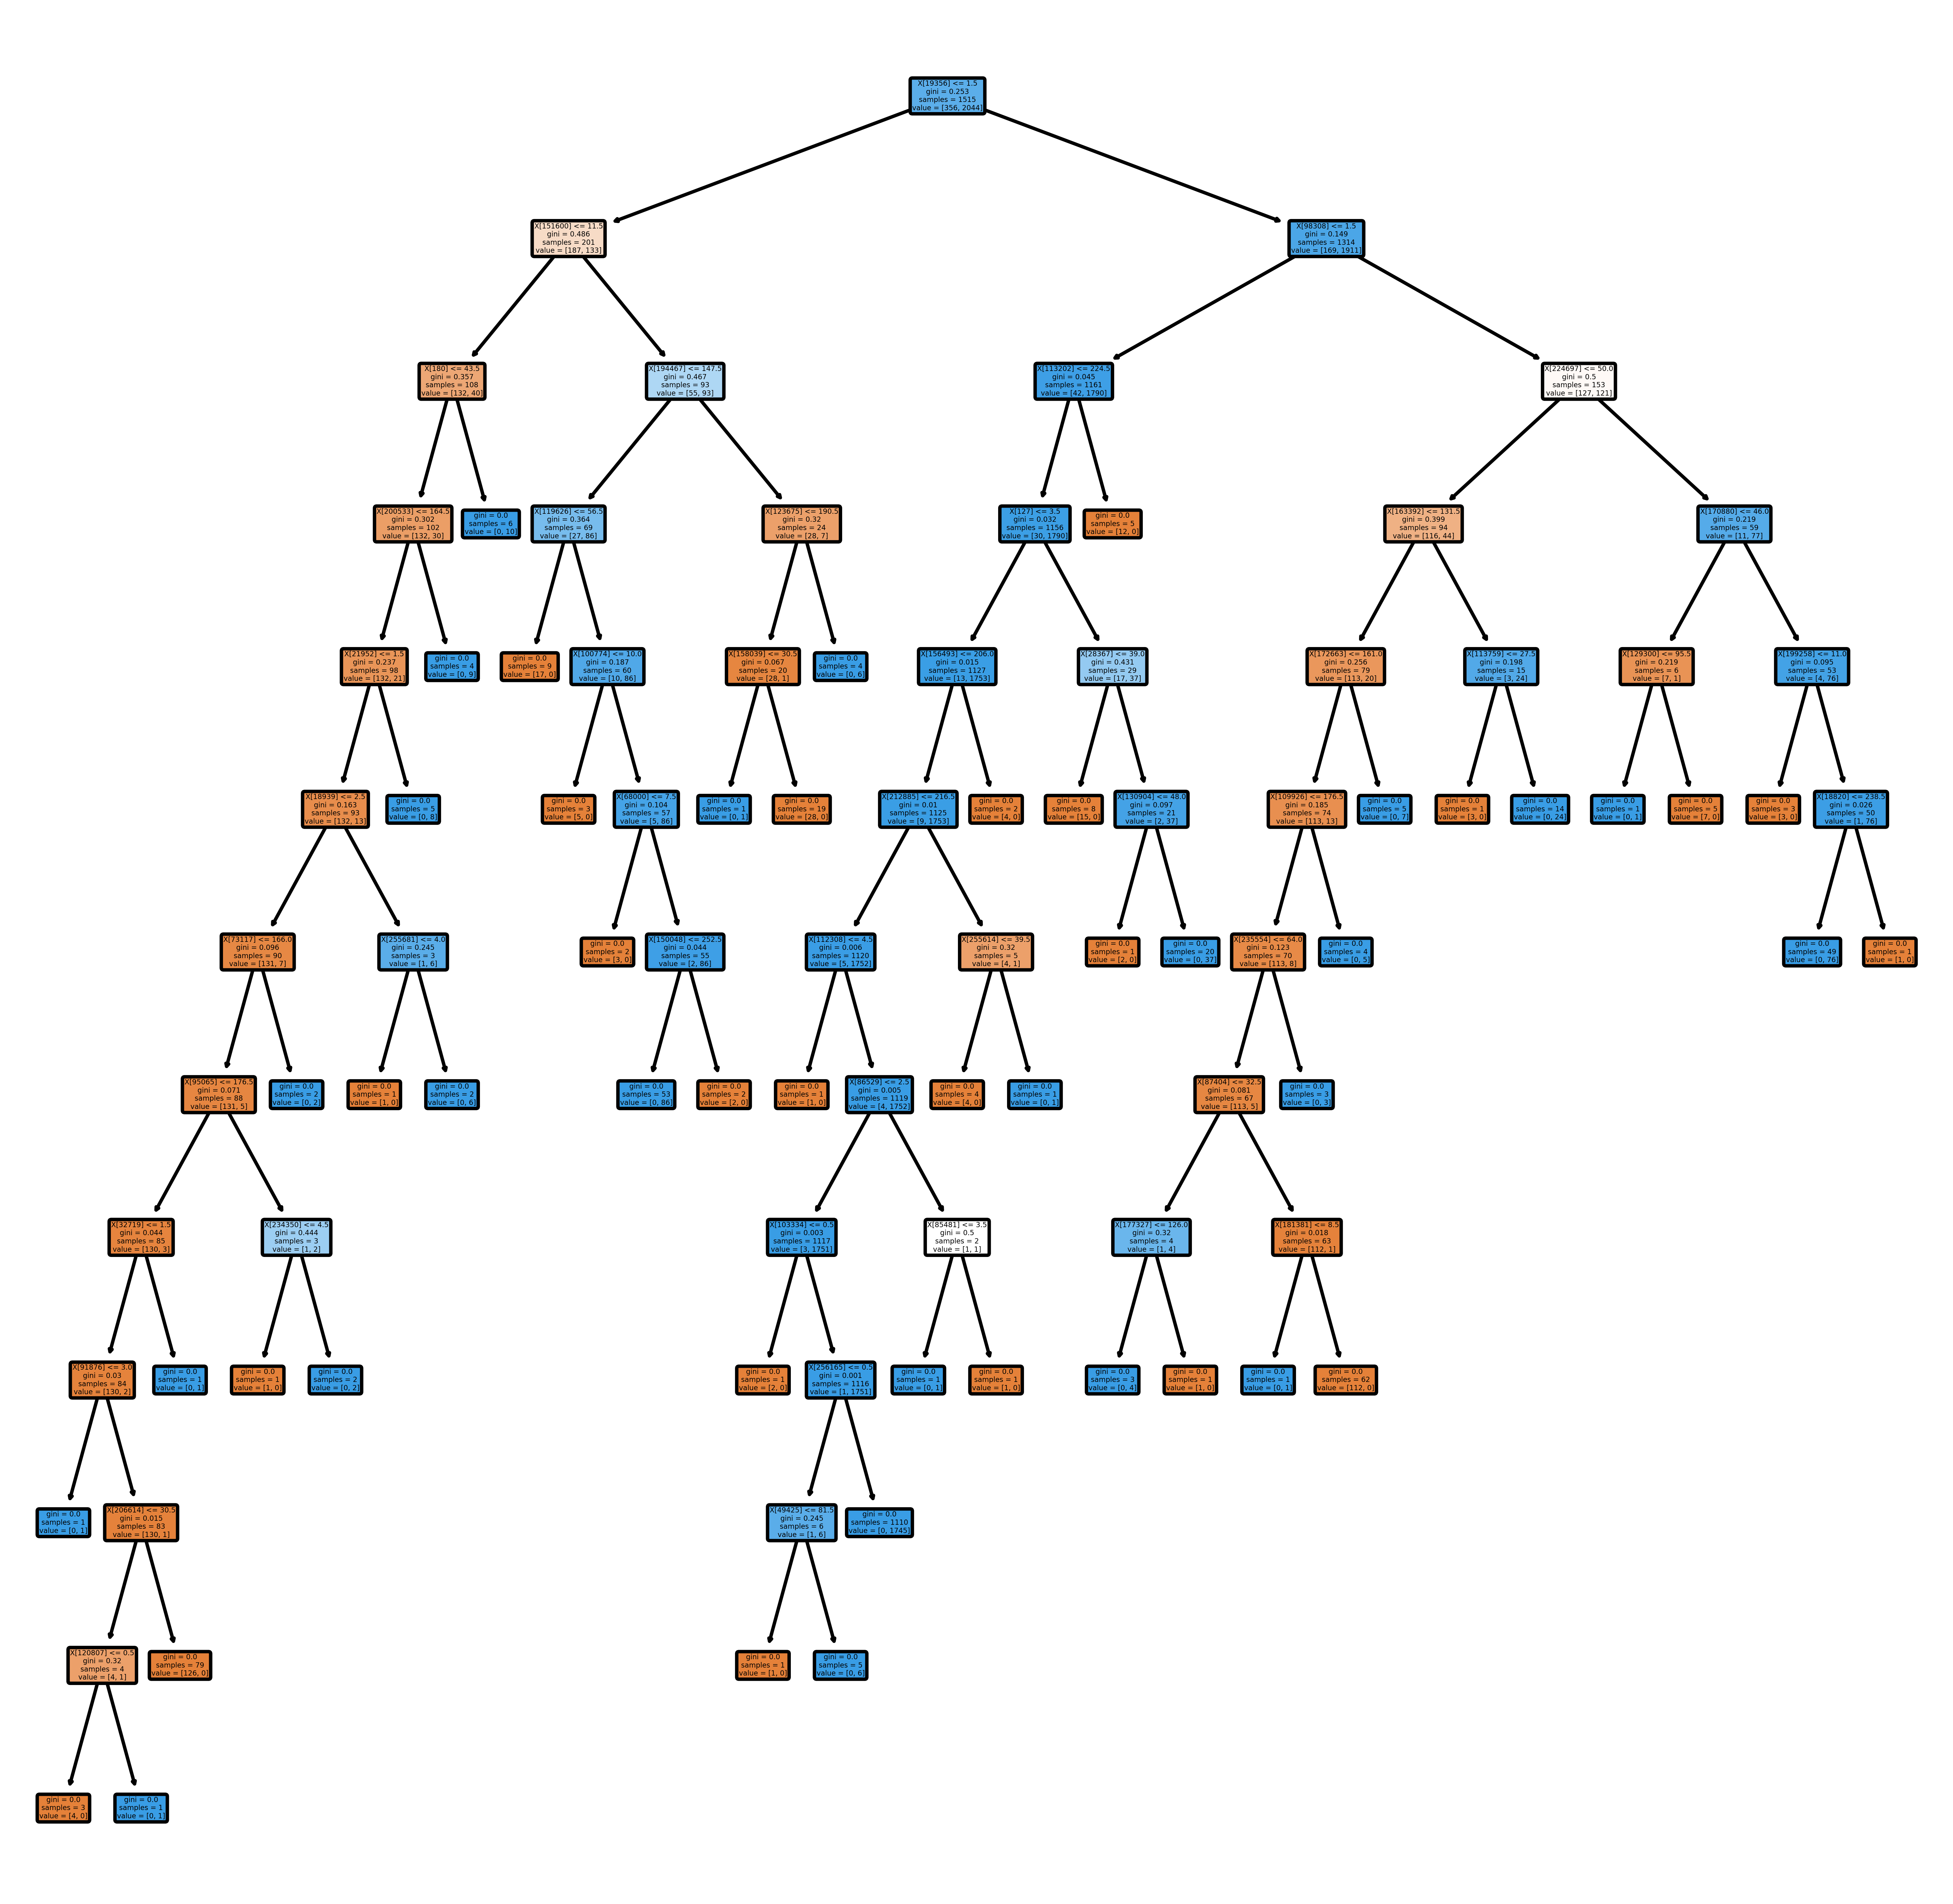

<Figure size 432x288 with 0 Axes>

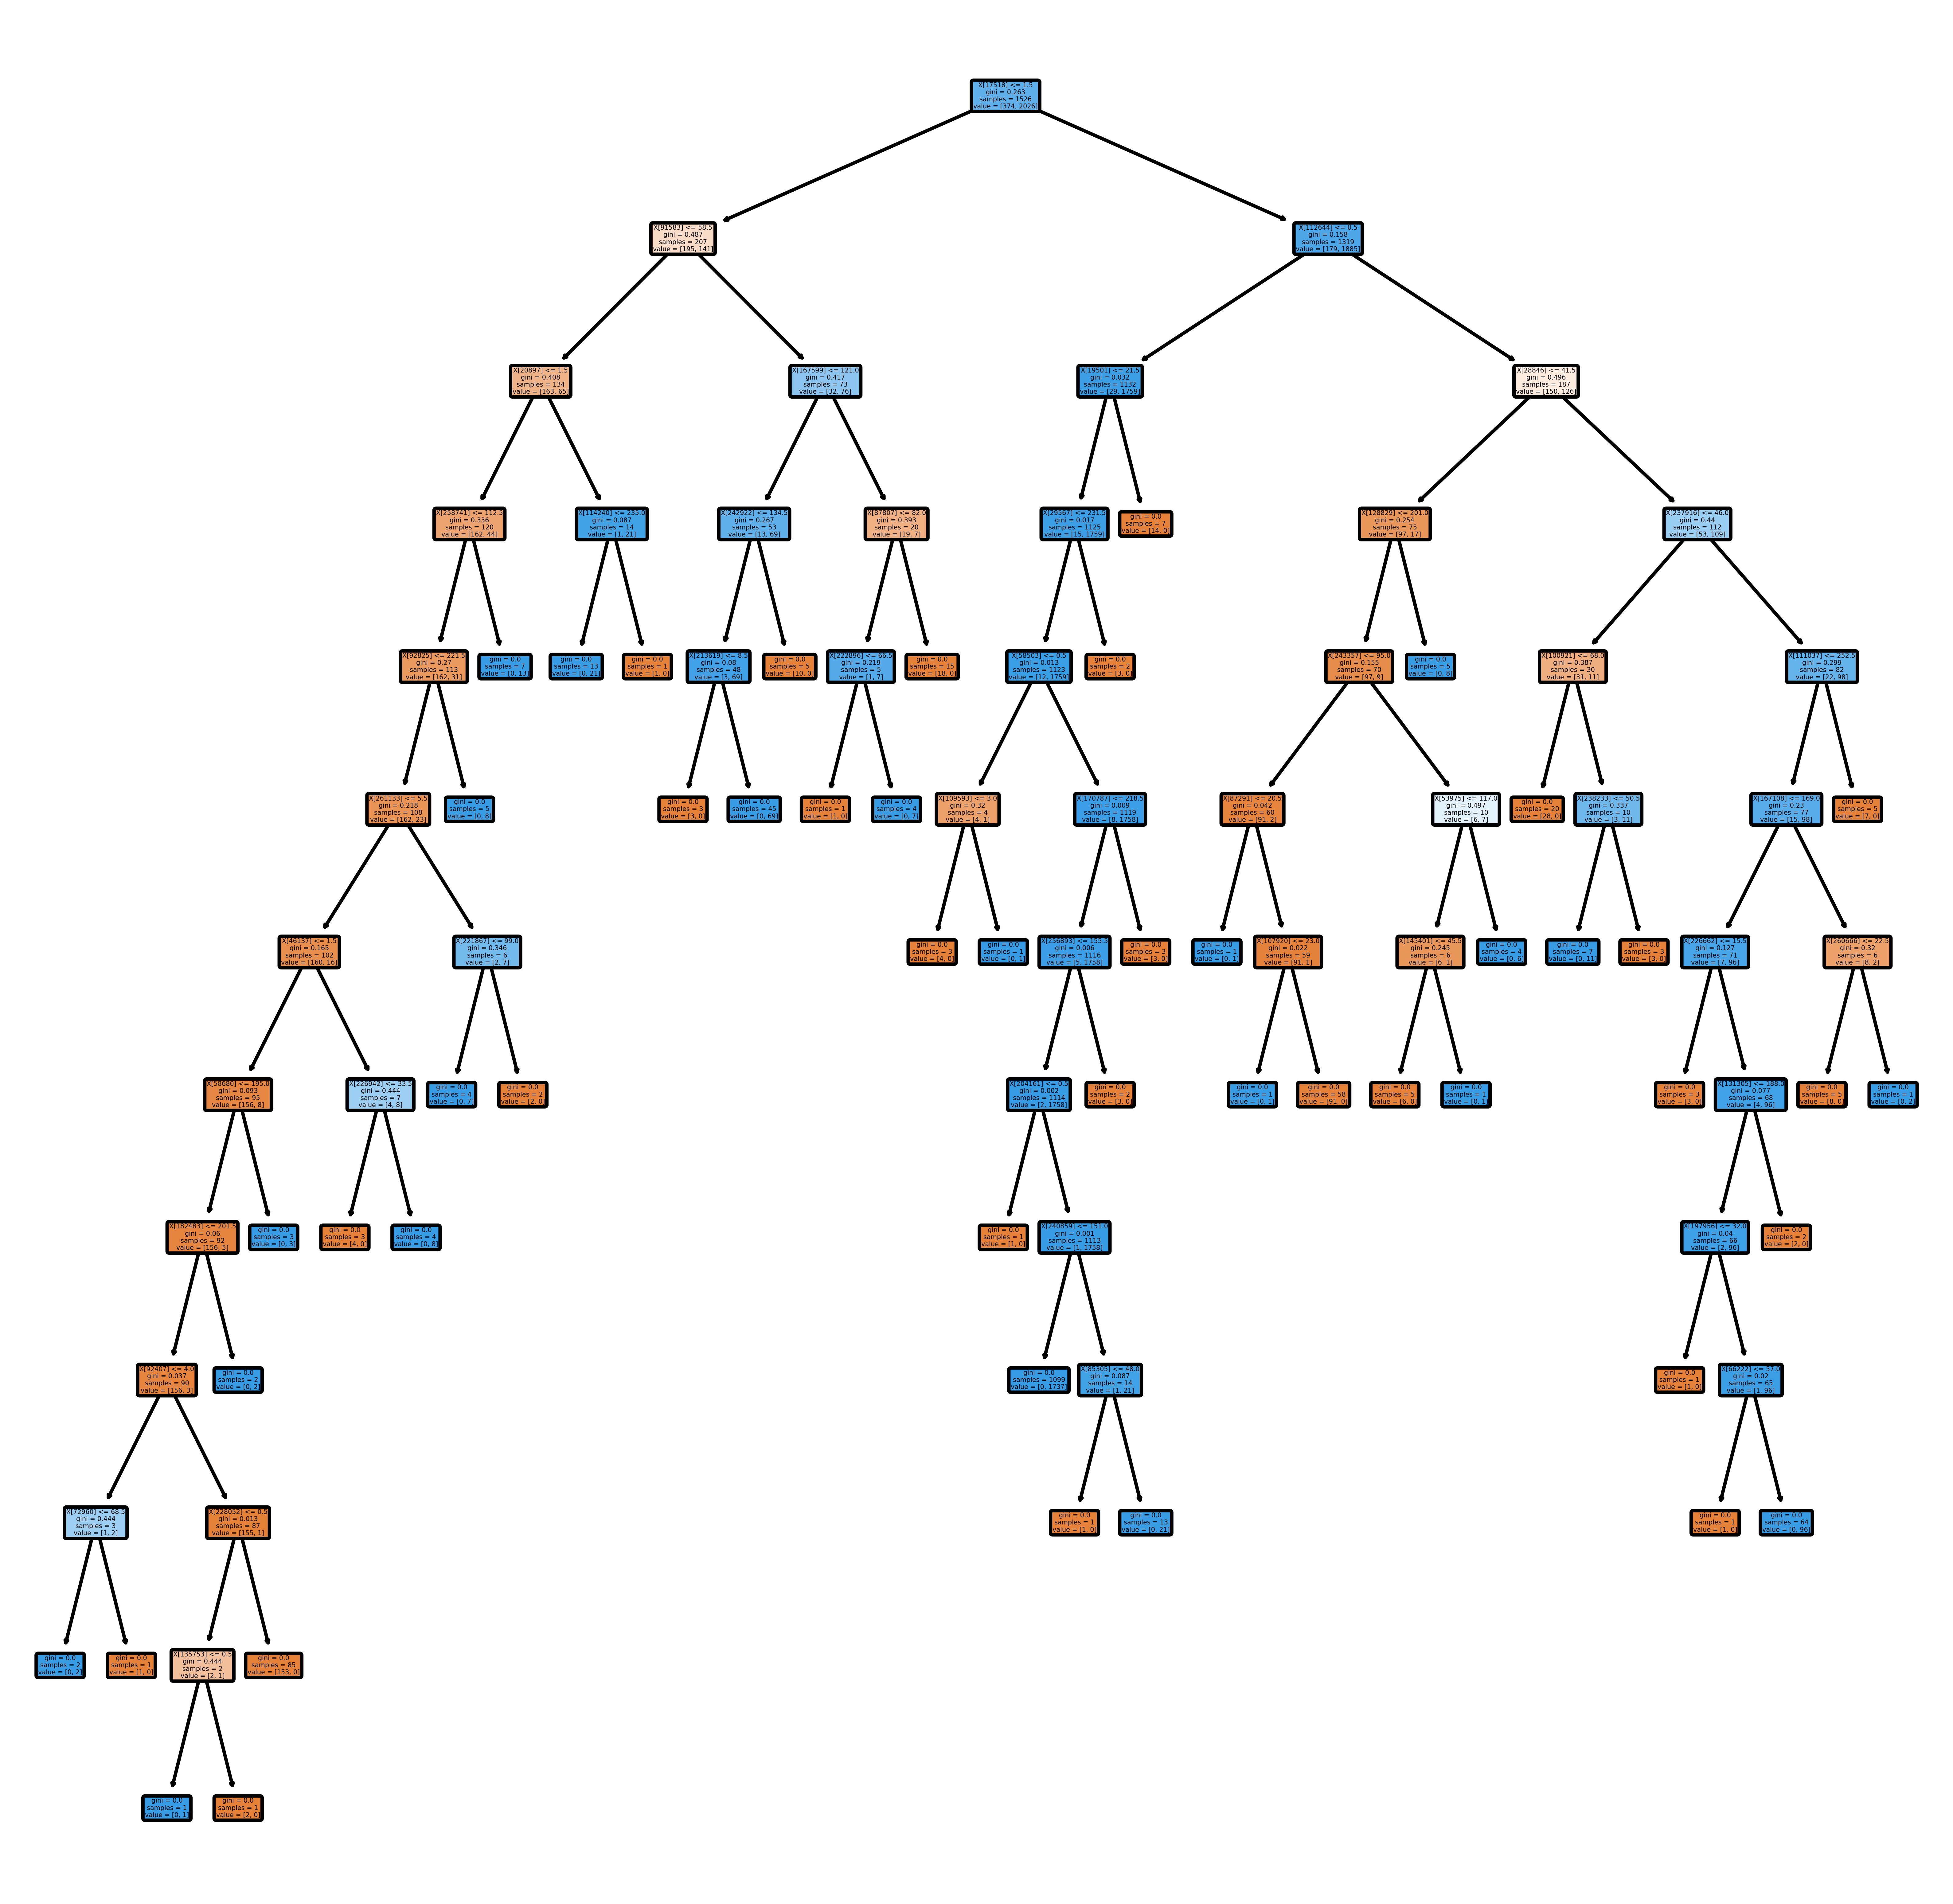

<Figure size 432x288 with 0 Axes>

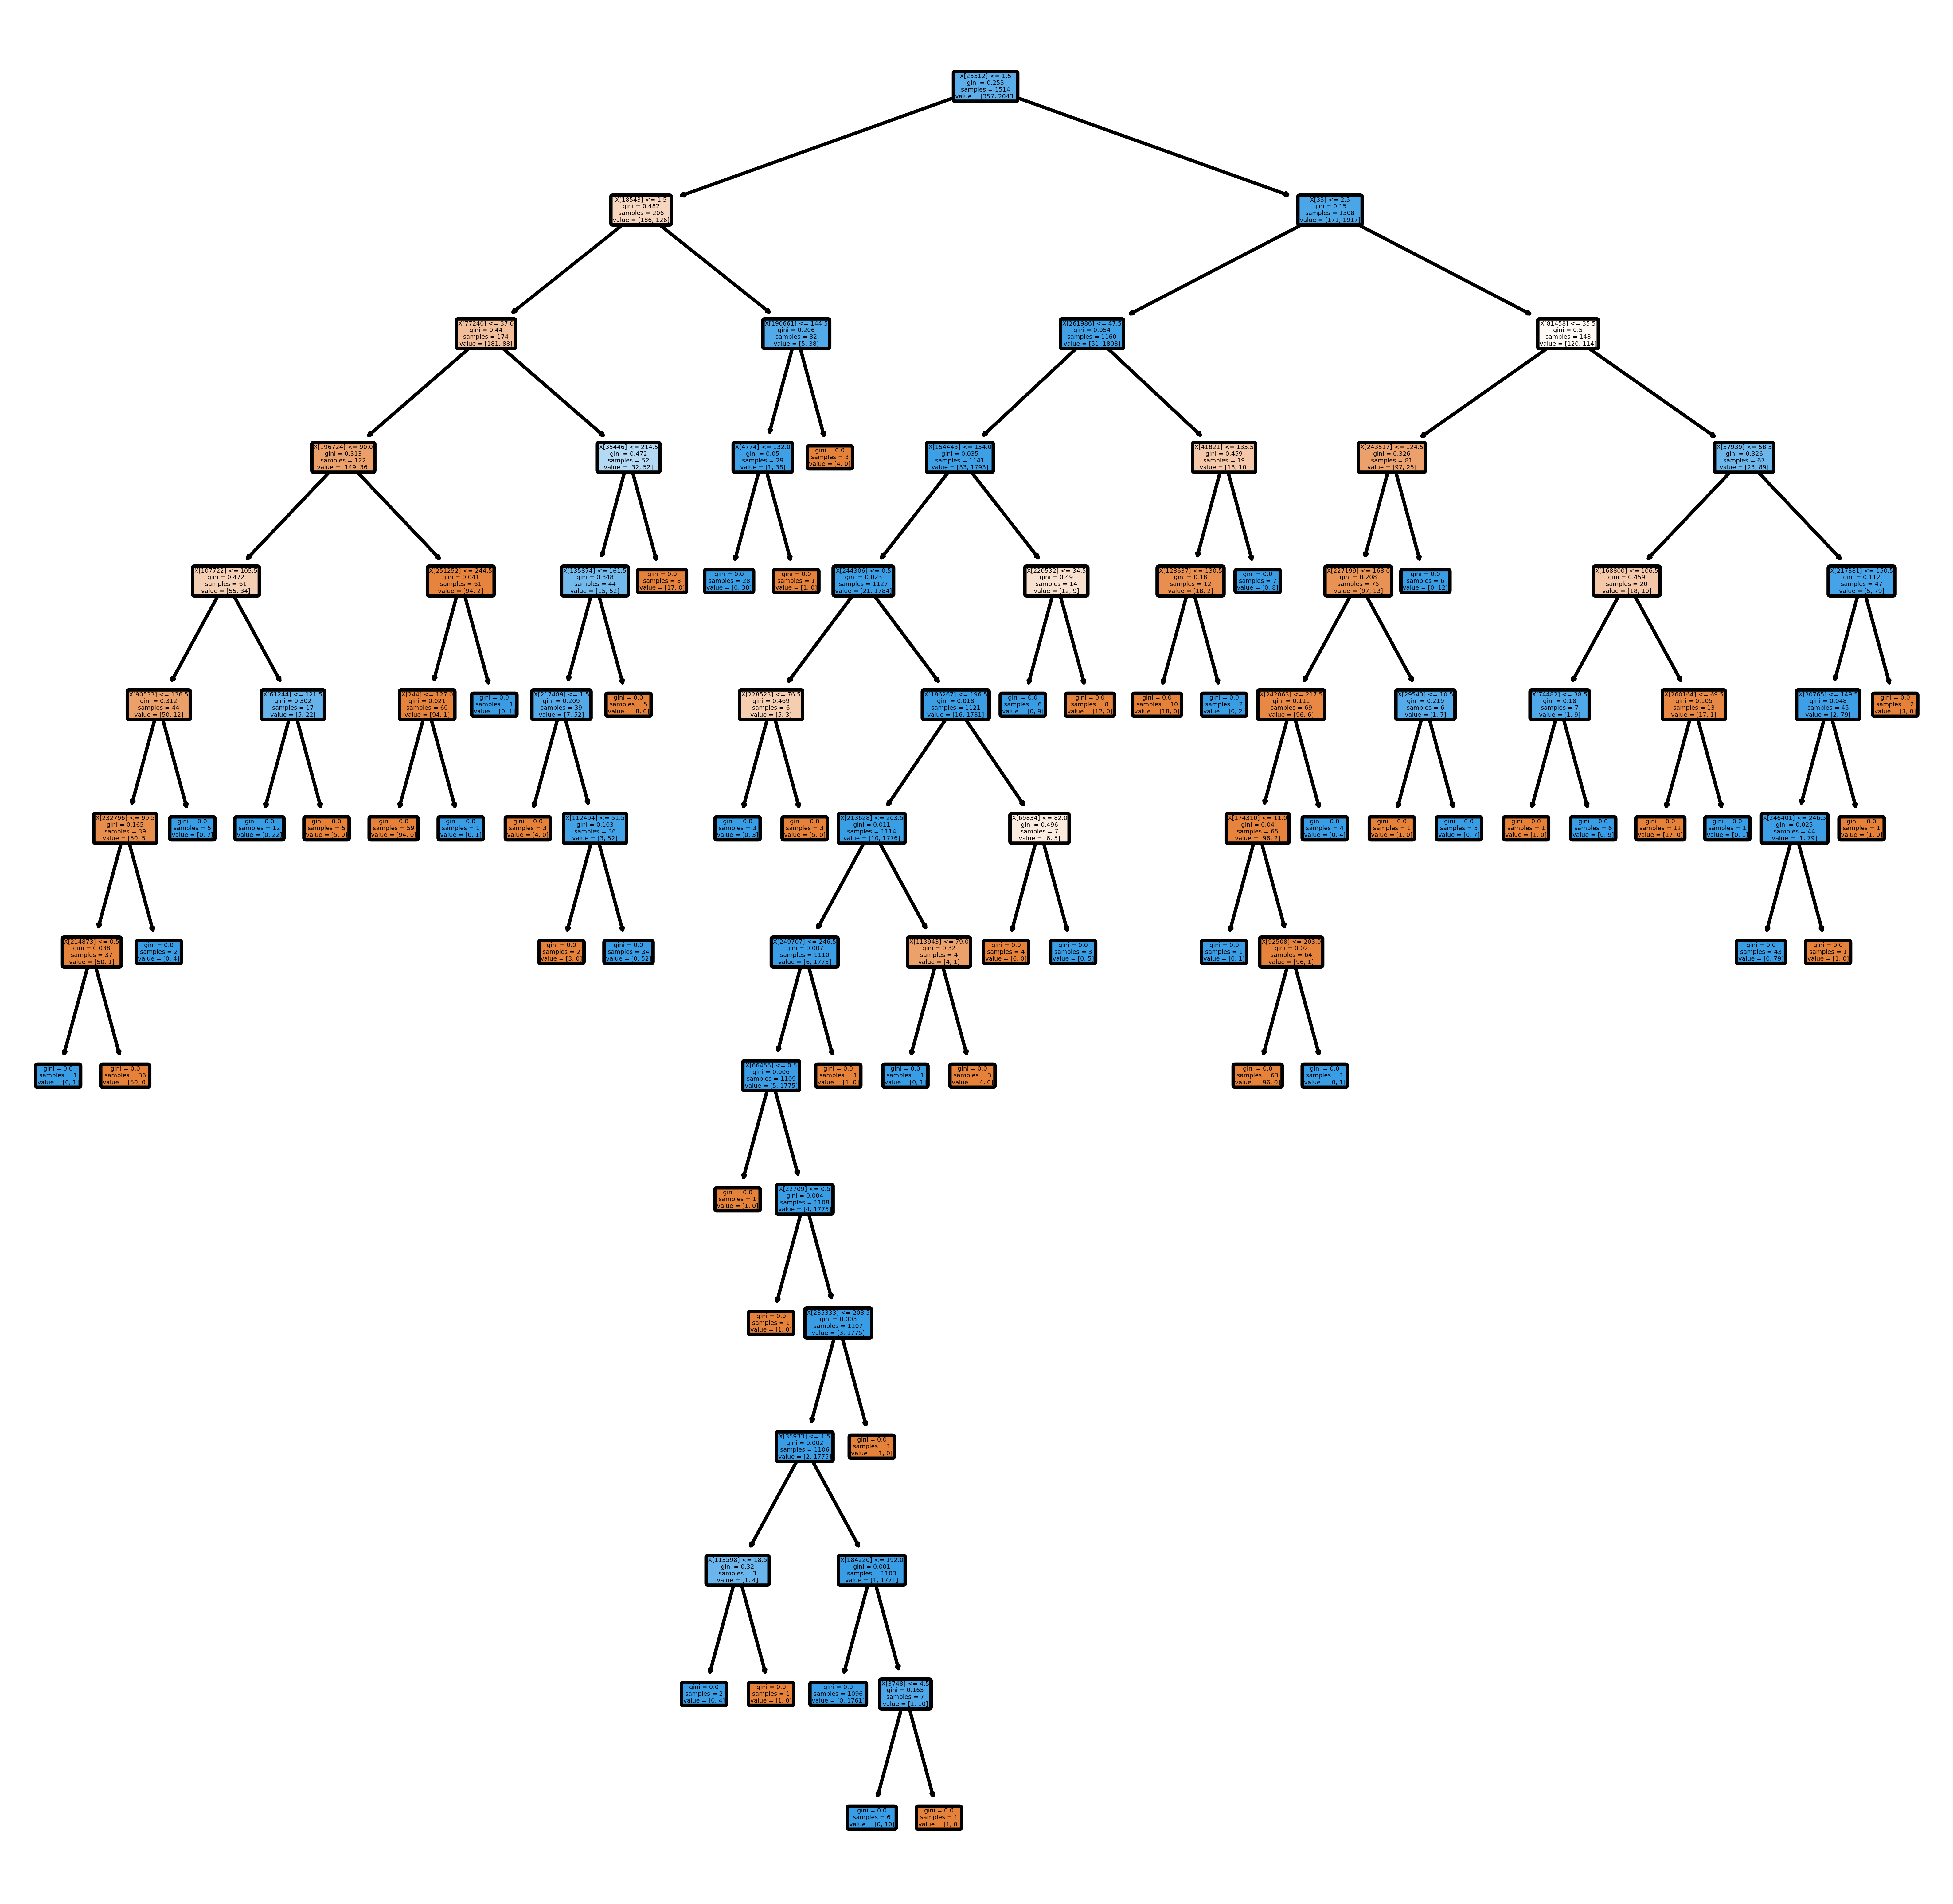

<Figure size 432x288 with 0 Axes>

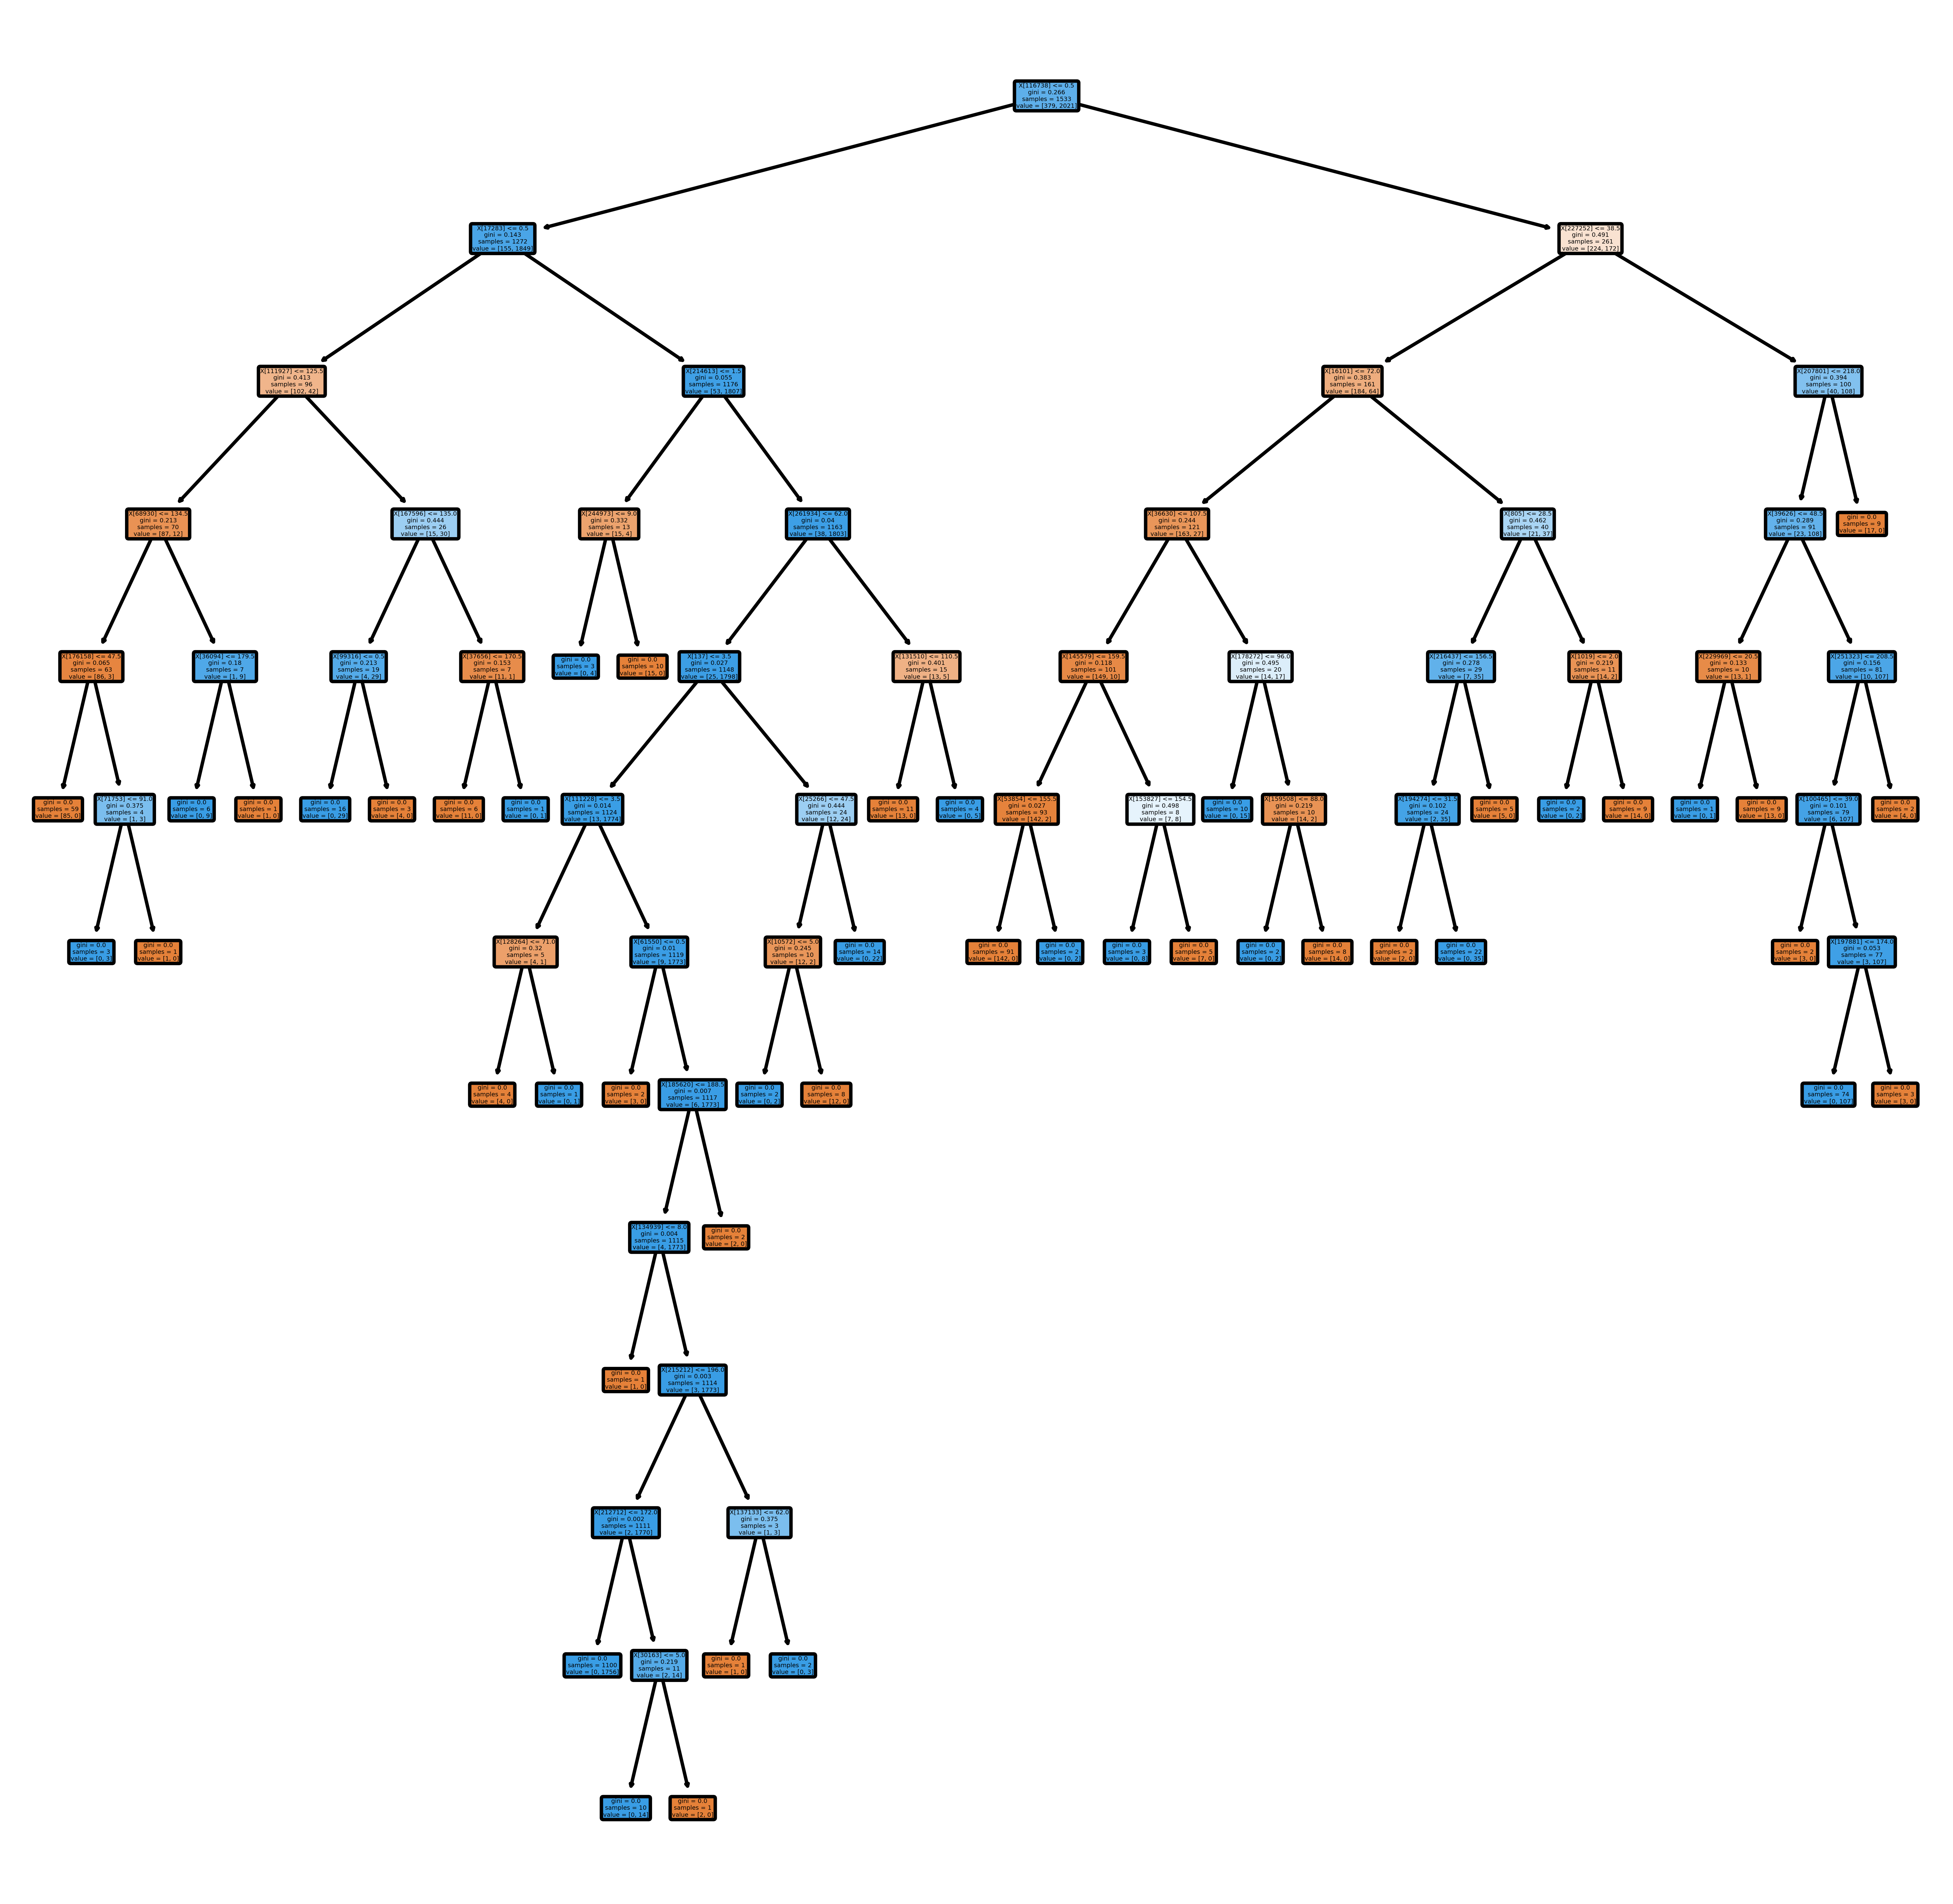

<Figure size 432x288 with 0 Axes>

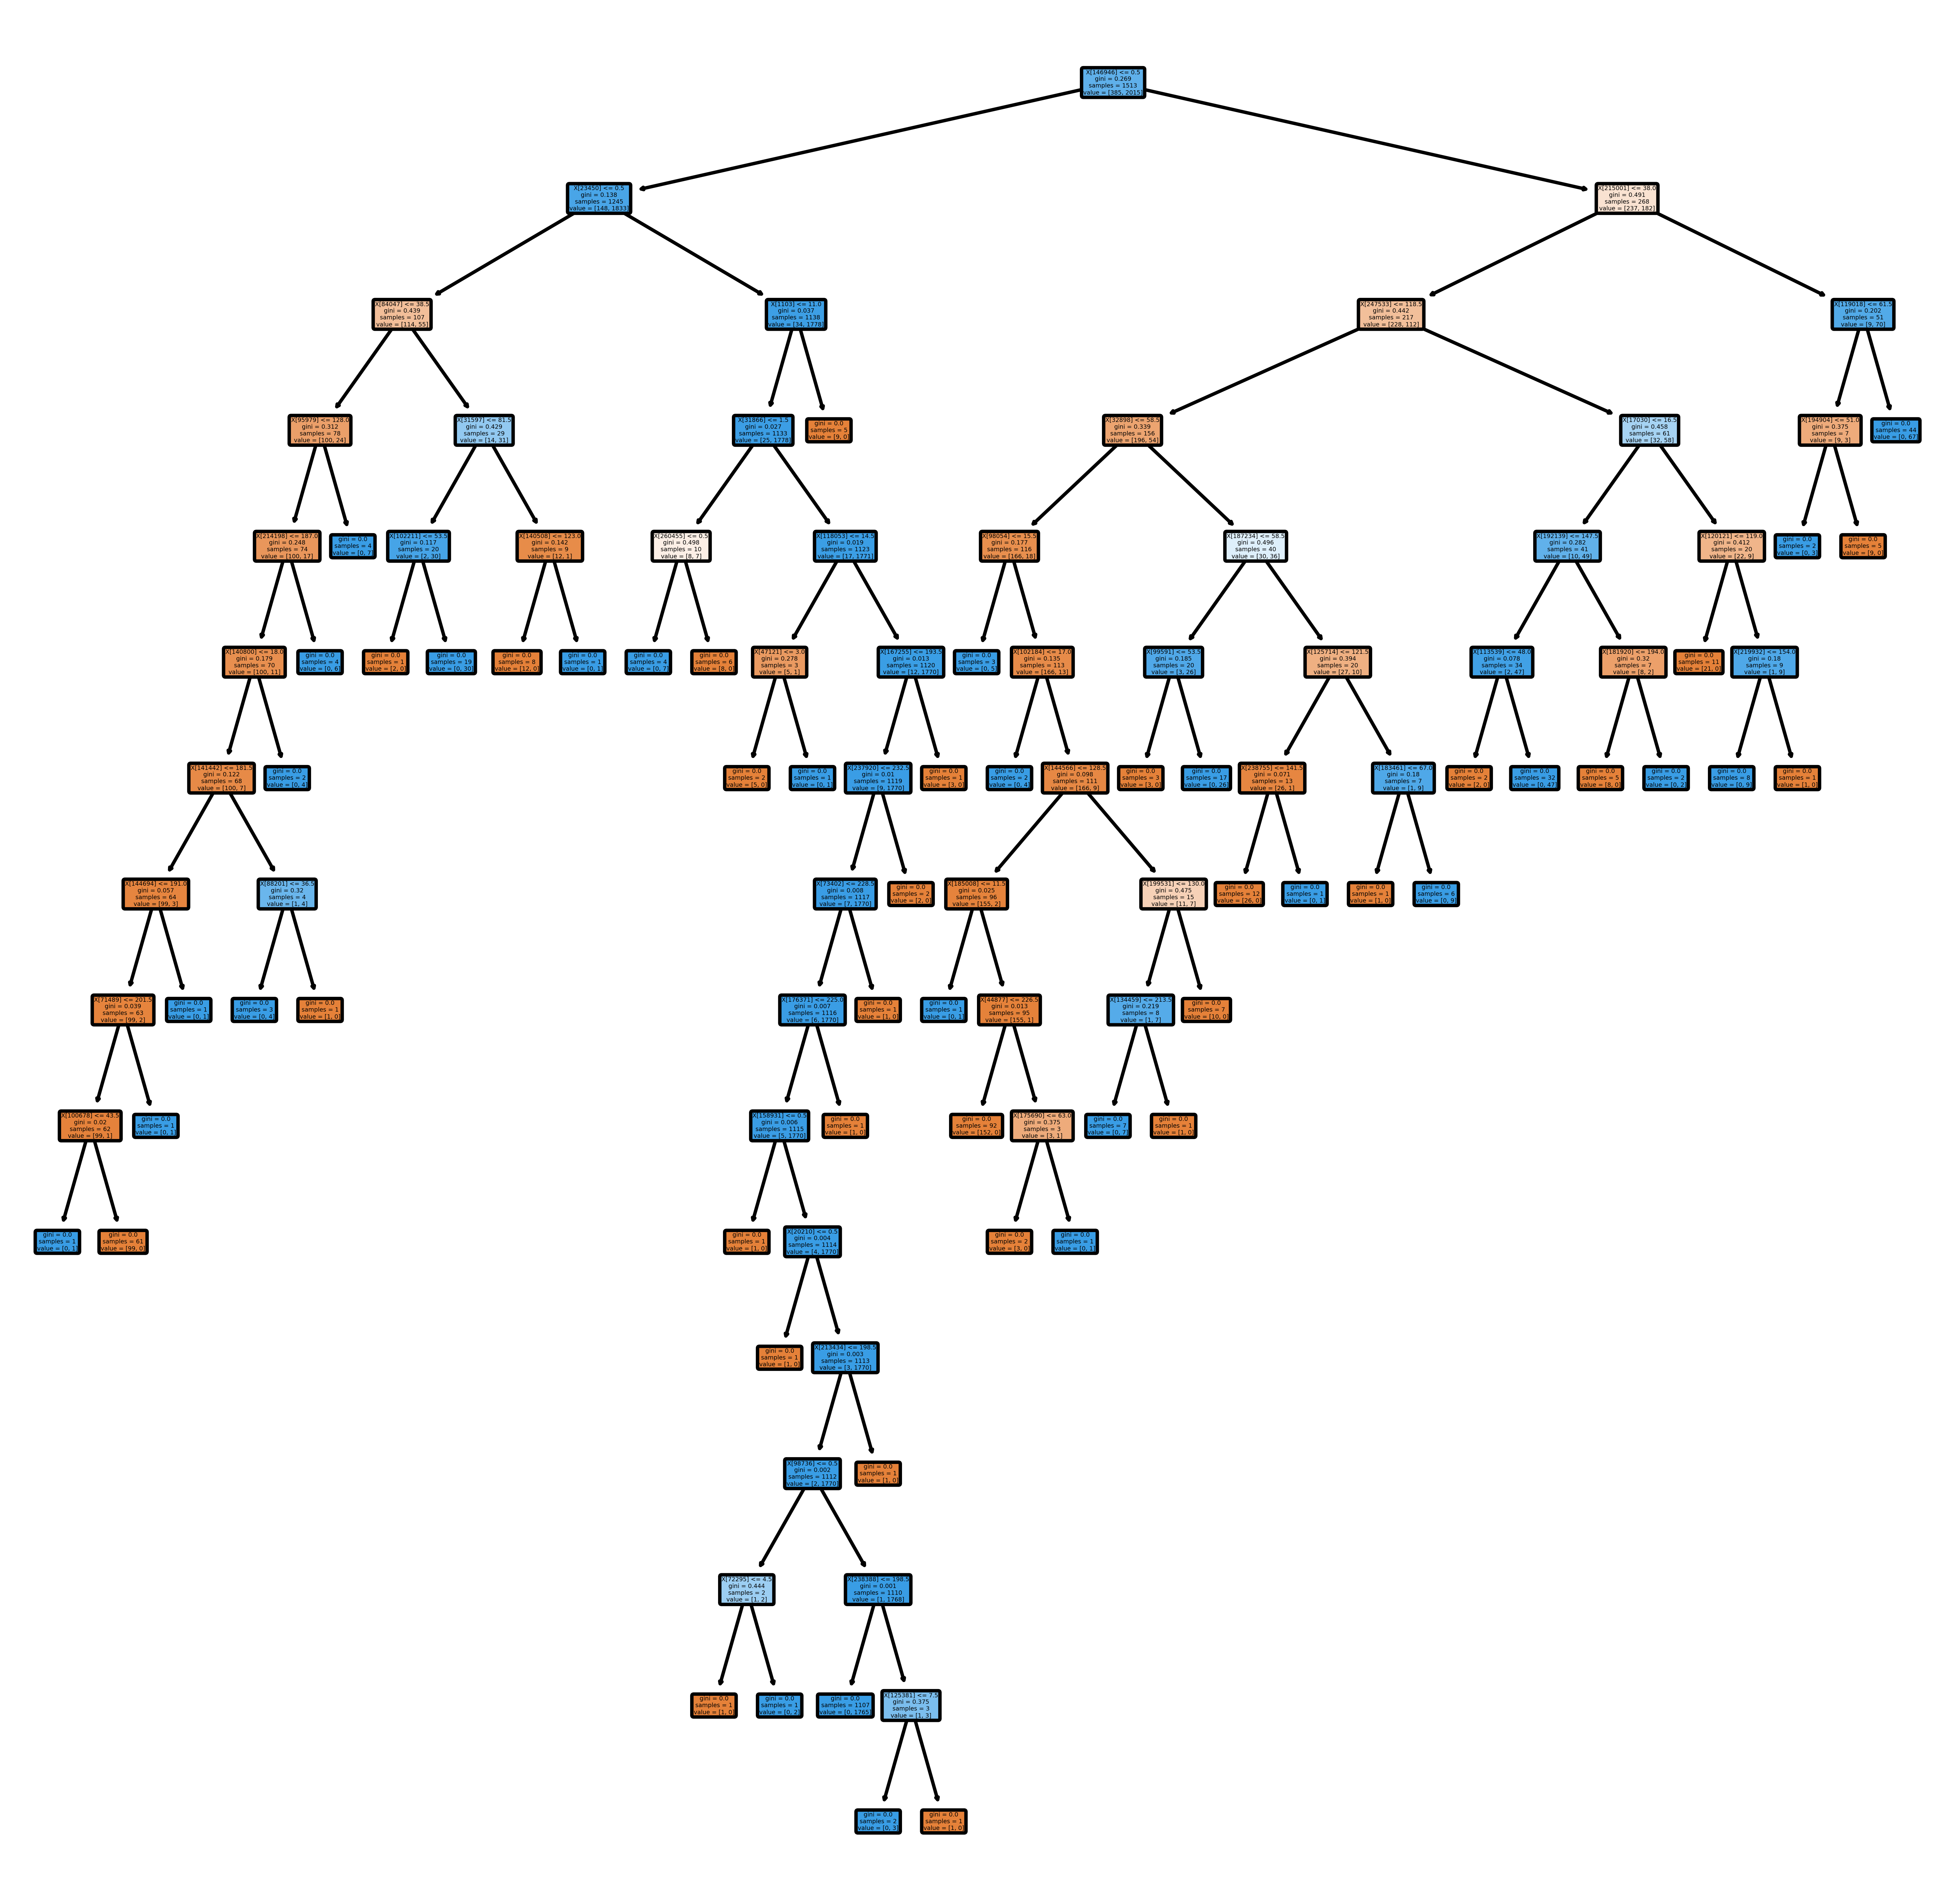

In [98]:
for index in range(0, 5):
    visualise_tree(clf.estimators_[index])